# Cluster Validity with Internal Criteria

In [17]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

## Cohesion

* __Compactness or cluster cohesion__: `Measures how close are the objects within the same cluster`. 
* A __lower__ within-cluster variation is an indicator of a good compactness (i.e., a good clustering). 
* The different indices for evaluating the compactness of clusters are base on distance measures such as the cluster-wise within average/median distances between observations.

$$\text{cohesion} = \sum_i\sum_{x\in C_i}(x-c_i)^2$$

We want this to be small

In [20]:
c1 =[[1,0],[1,1]] 
c2 =[[1,2],[2,3],[2,2],[1,2]] 
c3 =[[3,1],[3,3],[2,1]]
points = np.array(c1+c2+c3)
labels = np.array([0,0,1,1,1,1,2,2,2])

```
Cohesion(C1) = (1-1)^2 + (1-1)^2 + (0-.5)^2 + (1-.5)^2 = 0.5
Cohesion(C2) = ... = 1.75
Cohesion(C3) = ... = 3.3334

cohesion = 0.5 + 1.75 + 3.3334 = 5.583
```

In [37]:
mean1 = np.array(c1).mean(axis=0) 
wss1 = np.sum((np.array(c1)-mean1)**2)
print("centroid c1:", mean1)
print("WSS(c1):", wss1)
cohesion = wss1

mean2 = np.array(c2).mean(axis=0) 
wss2 = np.sum((np.array(c2)-mean2)**2)
print("centroid c2:", mean2)
print("WSS(c2):", wss2)
cohesion += wss2 

mean3 = np.array(c3).mean(axis=0) 
wss3 = np.sum((np.array(c3)-mean3)**2)
print("centroid c3:", mean3)
print("WSS(c3):", wss3)
cohesion += wss3

print("cohesion:", cohesion)

centroid c1: [1.  0.5]
WSS(c1): 0.5
centroid c2: [1.5  2.25]
WSS(c2): 1.75
centroid c3: [2.66666667 1.66666667]
WSS(c3): 3.3333333333333335
cohesion: 5.583333333333334


##  Separation

* __Separation__: `Measures how well-separated a cluster is from other clusters`. 
* The indices used as separation measures include:
  -  distances between cluster centers
  -  the pairwise minimum distances between objects in different clusters

As an example we compute the average distance between cluster centers

In [46]:
def euclidean_dist(a, b):
    return np.sqrt(np.sum((a - b)**2))
dist = euclidean_dist(mean1, mean2)
dist += euclidean_dist(mean1, mean3)
dist += euclidean_dist(mean2, mean3)
dist/3

1.7196087983835415

## Silhouette Coefficient

* If the ground truth labels are not known, evaluation must be performed using the model itself. 
* A __higher__ Silhouette Coefficient score relates to a model with __better defined clusters__. 
* The Silhouette Coefficient is defined for each sample and is composed of two scores:
  - __a__: The mean distance between a sample and all other points in the same cluster.
  - __b__: The mean distance between a sample and all other points in the next nearest cluster.

The Silhouette Coefficient $s$ for a single sample is then given as:
$$s = 1 - \frac{a}{b}$$

The Silhouette Coefficient for a set of samples is given as the mean of the Silhouette Coefficient for each sample.


### Simple example

In [4]:
c1 =[[1,0],[1,1]] 
c2 =[[1,2],[2,3],[2,2],[1,2]] 
c3 =[[3,1],[3,3],[2,1]]

##### Silhouette Coefficient for a single sample
Take a point [1,0] in cluster c1

Calculate its __average distance__ to all other points in it’s cluster, i.e. cluster c1

So $a_1 =\sqrt{( (1-1)^2 + (0-1)^2)} =\sqrt{(0+1)}=\sqrt{1}=1$

Now for the object [1,0] in cluster c1 calculate its average distance from all the objects in cluster 2 and cluster 3. Of these take the minimum average distance.

So for cluster 2
```
{1,0} ----> {1,2} = distance = √((1-1)^2 + (0-2)^2) =√(0+4)=√4=2
{1,0} ----> {2,3} = distance = √((1-2)^2 + (0-3)^2) =√(1+9)=√10=3.16
{1,0} ----> {2,2} = distance = √((1-2)^2 + (0-2)^2) =√(1+4)=√5=2.24
{1,0} ----> {1,2} = distance = √((1-1)^2 + (0-2)^2) =√(0+4)=√4=2
```
Therefore, the average distance of point {1,0} in cluster 1 to all the points in cluster 2 =
```
(2+3.16+2.24+2)/4 = 2.325
```
Similarly, for cluster 3
```
{1,0} ----> {3,1} = distance = √((1-3)^2 + (0-1)^2) =√(4+1)=√5=2.24
{1,0} ----> {3,3} = distance = √((1-3)^2 + (0-3)^2) =√(4+9)=√13=3.61
{1,0} ----> {2,1} = distance = √((1-2)^2 + (0-1)^2) =√(1+1)=√2=2.24
```
Therefore, the average distance of point {1,0} in cluster 1 to all the points in cluster 3 =
```
(2.24+3.61+2.24)/3 = 2.7
```
Now, the __minimum average distance__ of the point {1,0} in cluster 1 to the other clusters 2 and 3 is,
```
b1 =2.325 (2.325 < 2.7)
```
So the silhouette coefficient of cluster 1
```
s1= 1 - a1/b1 = 0.5699
```
In a similar fashion you need to calculate the silhouette coefficient for cluster 2 and cluster 3 separately by taking any single object point in each of the clusters and repeating the steps above. Of these the cluster with the greatest silhouette coefficient is the best as per evaluation.

In [12]:
a1=1
b1=2.325
s1=1 - (a1/b1)
print("silhouette coefficient of cluster 1:", s1)

silhouette coefficient of cluster 1: 0.5698924731182796


##### Silhouette Coefficient for a set of samples

In [9]:
points = np.array(c1+c2+c3)
labels = np.array([0,0,1,1,1,1,2,2,2])
metrics.silhouette_score(points, labels, metric='euclidean')

0.23320709938729836

### Real example

In [2]:
X, y = datasets.load_iris(return_X_y=True)

kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans_model.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.5528190123564091

Now showing how we can use the Silhouette value Method to find the value of ‘k’.

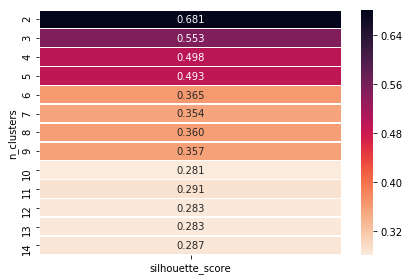

In [19]:
results = []
for c in range(2,15):
    kmeans_model = KMeans(init="k-means++", n_clusters=c, random_state=1).fit(X)
    silhouette_avg = metrics.silhouette_score(X, kmeans_model.labels_, metric='euclidean')
    results.append([c, silhouette_avg])
result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

plt.figure()
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

# Evaluation with External “Ground Truth”